In [70]:
from collections import namedtuple
import re
import sys

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
# We are reading here the output of the following process which was run outside of this notebook:
# python examples/find_patterns_in_collection.py <PATH_TO_DIRECOTRY_CONTAINING_SGF_FILES> 9 9 3 10 40 True gotopics

collection_df = pd.read_csv(<PATH_TO_CSV_FILE_PRODUCED_BY_SCRIPT_ABOVE>)

In [36]:
# Number of patterns
collection_df.shape[0]

398208

In [50]:
# Year span of this collection
collection_df['year'].min(), collection_df['year'].max()

(196, 2005)

In [65]:
# Find the most frequent patterns in each year, to get some candidates for visualization
min_games_per_year = 10
top_patterns_per_year = 3
years = list(range(collection_df['year'].min(), collection_df['year'].max()+1))
frequent_patterns = set()
for year in years:
    num_games_in_year = collection_df['sgf_filename'][collection_df['year'] == year].unique().shape[0]
    if num_games_in_year < min_games_per_year:
        continue
    top_patterns_in_year = collection_df.where(collection_df['year'] == year)['pattern'].value_counts()
    for i in range(min(top_patterns_per_year, len(top_patterns_in_year))):
        frequent_patterns.add(top_patterns_in_year.index[i])

In [66]:
# How many unique patterns did  we get by picking the top-3 patterns from each year?
len(frequent_patterns)

58

In [77]:
# Visualize the frequency of a given pattern over years, as ratio of number of games in given year with pattern over total
# number of games in given year
# pattern = collection_by_year_df.iloc[0].name[1] # TODO actual pattern, make a function param

PatternMatchInYear = namedtuple('PatternMatchInYear', 'year, num_games_in_year, num_games_in_year_with_pattern, frequency')

# yearly_match_info is a list of PatternMatchInYear items
PatternMatchTimeline = namedtuple('PatternMatchTimeline', 'pattern, yearly_match_info')

years = list(range(collection_df['year'].min(), collection_df['year'].max()+1))
pattern_frequencies = []
for pattern in frequent_patterns:
    yearly_match_info = []
    for year in years:
        num_games_in_year = collection_df['sgf_filename'][collection_df['year'] == year].unique().shape[0]
        num_games_in_year_with_pattern = 0
        try:
            num_games_in_year_with_pattern = collection_df[(collection_df['pattern'] == pattern) & 
                                                               (collection_df['year'] == year)]['sgf_filename'].unique().shape[0]
        except KeyError:
            pass
        assert num_games_in_year >= num_games_in_year_with_pattern
        freq = 0
        if num_games_in_year != 0:
            freq = 1.0 * num_games_in_year_with_pattern / num_games_in_year
        yearly_match_info.append(PatternMatchInYear(year=year, num_games_in_year=num_games_in_year,
                                                    num_games_in_year_with_pattern=num_games_in_year_with_pattern,
                                                    frequency=freq))
    pattern_frequencies.append(PatternMatchTimeline(pattern=pattern, yearly_match_info=yearly_match_info))

In [78]:
len(pattern_frequencies)

58


. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
w . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


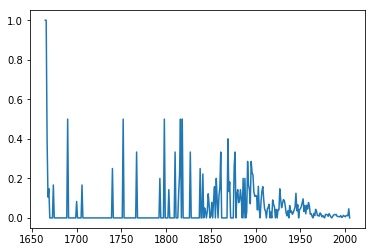



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
b . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


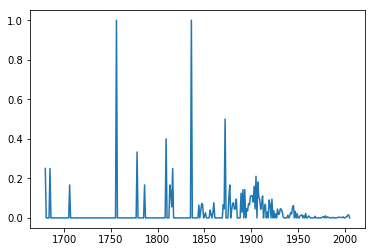



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


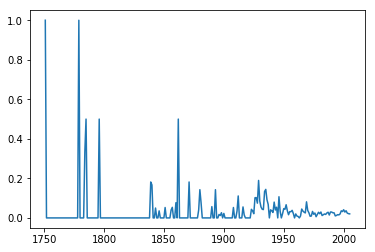



. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
w . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


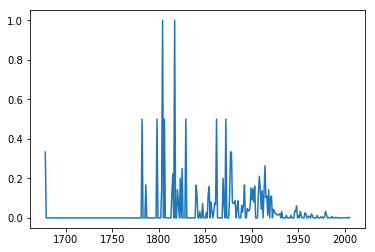



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . . . . =
. . . . . w . . . =
. . . . . . . . . =
= = = = = = = = = =


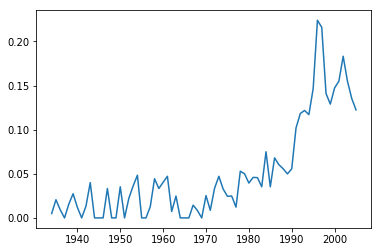



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . w . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


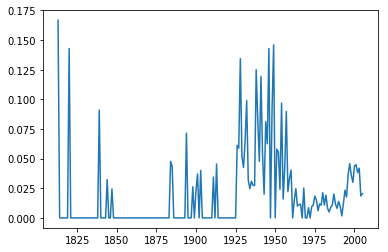



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
b . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


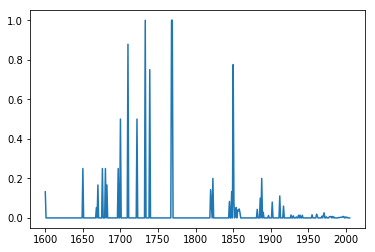



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


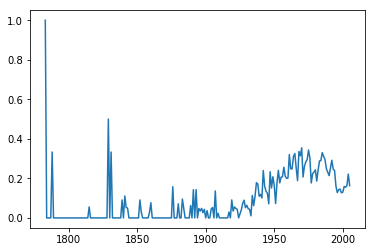



. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . w b . . =
. . . . . . . . . =
. . . . . . b . . =
w . b . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


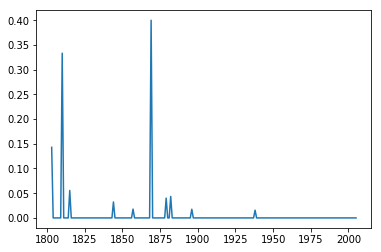



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. b . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


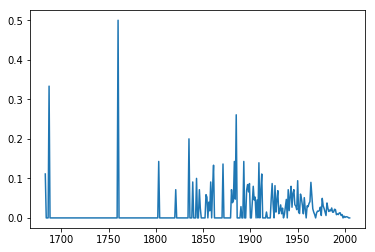



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


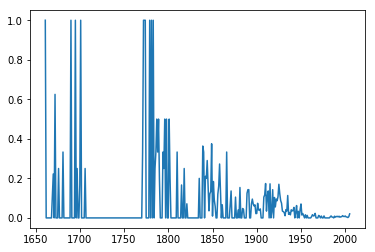



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
w . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


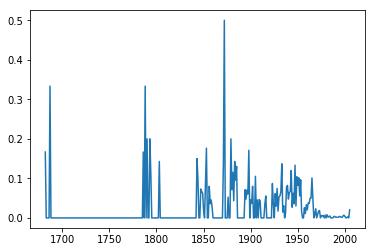



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
b . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


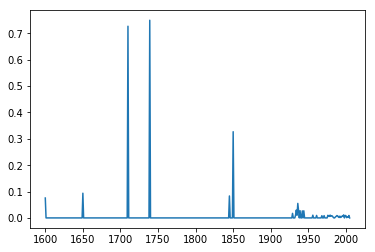



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


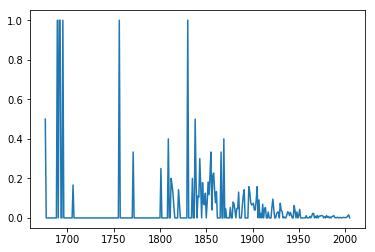



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. . b . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


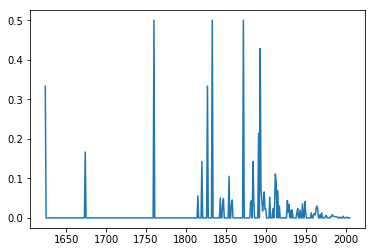



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. b . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


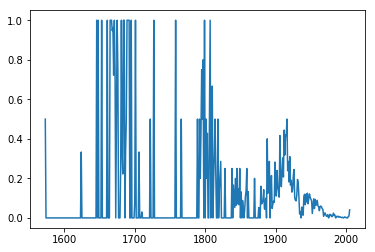



. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
. . . . b . . . . =
. w . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


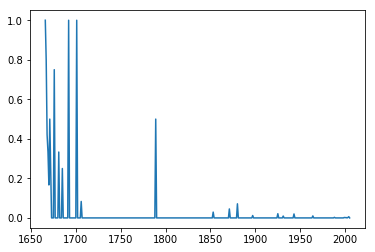



. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
. w . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


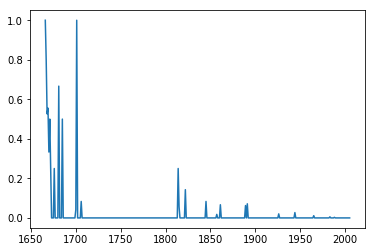



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . b . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


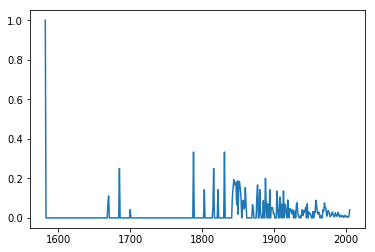



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . . . . =
. . . . . . . . . =
. . . . . . w . . =
. w . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


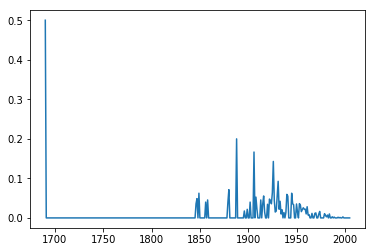



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b . . . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


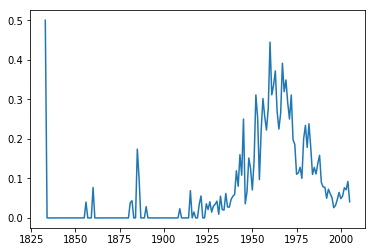



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . b . . . w . . =
. . w . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


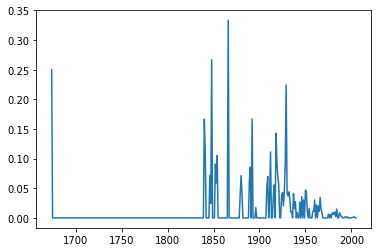



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
. . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


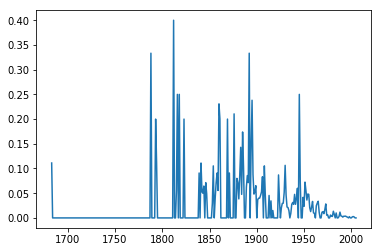



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


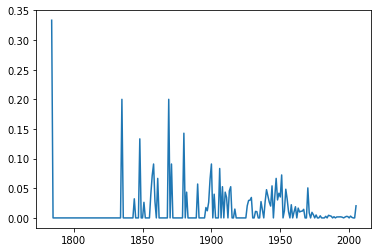



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . b . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


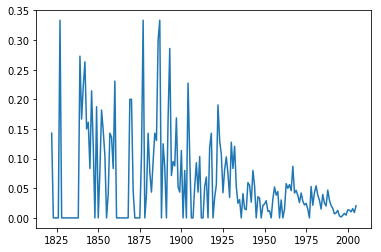



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b w . . . b . . =
. . b . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


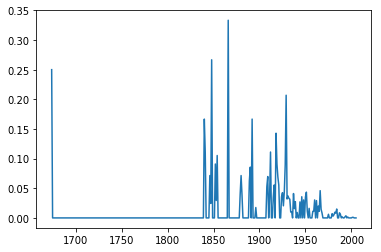



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
w . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


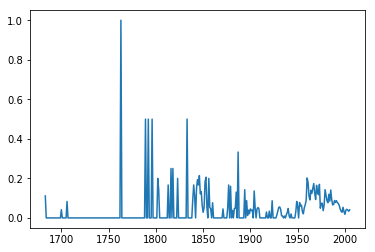



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


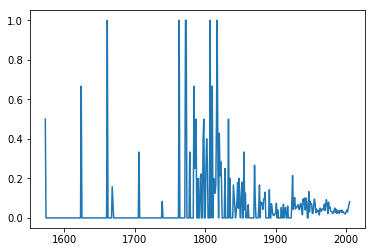



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . w . b . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


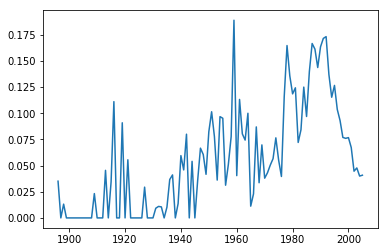



. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
b . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


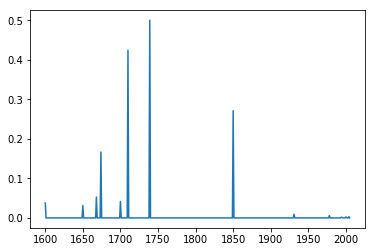



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b w . . =
. . . w b w . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


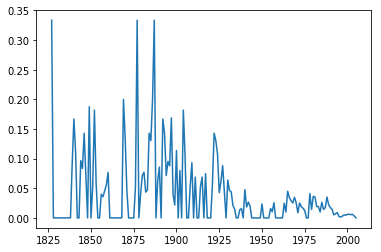



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . . . . =
. . . . . b . . . =
. . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


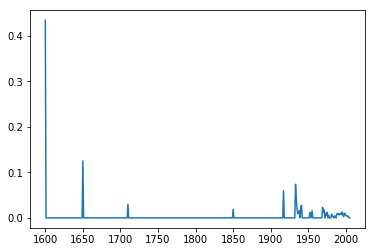



. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . b . . =
w . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


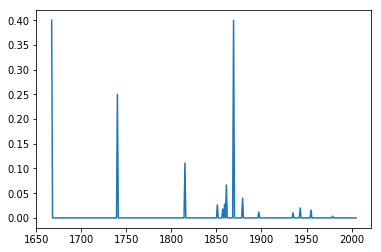



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b . w . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


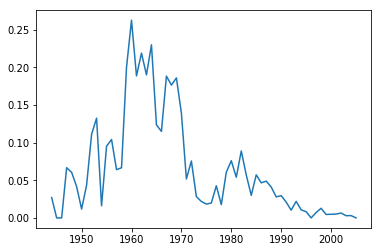



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . w . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


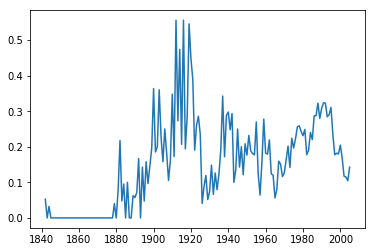



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
w . . . b w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


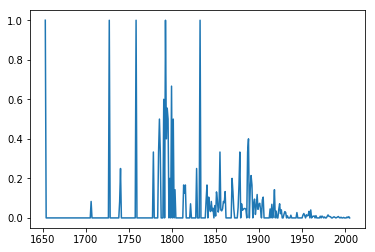



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


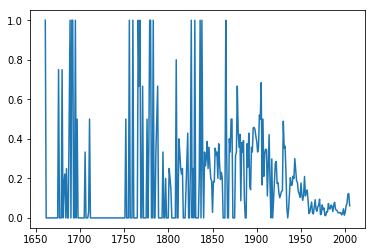



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . b . . . =
. . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


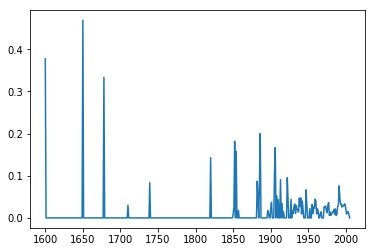



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . w b . . . =
. . . . . b . . . =
. . . . . . . . . =
= = = = = = = = = =


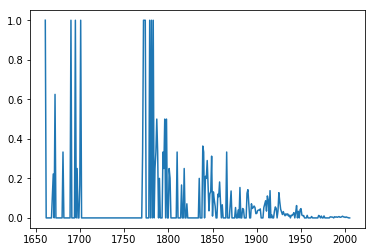



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . b . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


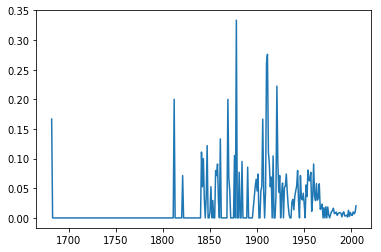



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . b w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


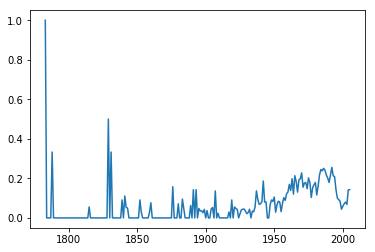



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . w . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


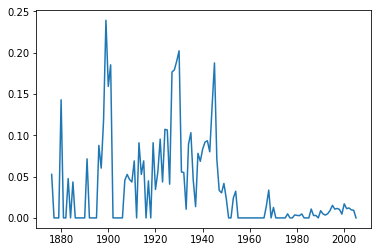



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . w b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


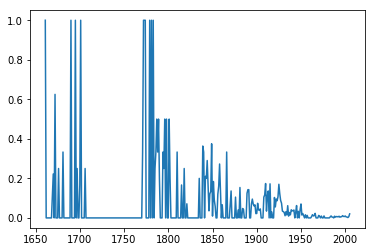



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . . . . =
. . . . . . . . . =
. . . . . . w . . =
w . . . b . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


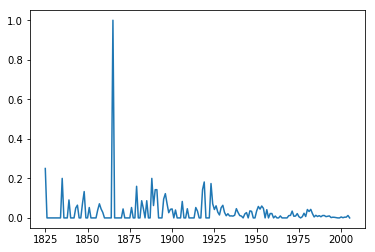



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . . . . . =
. . . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


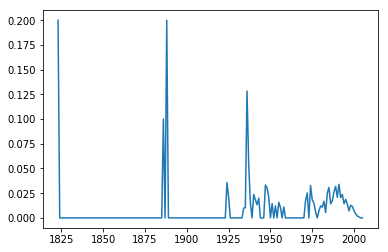



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . b . . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


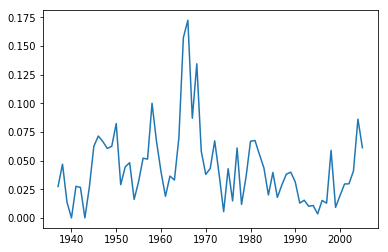



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . b . . =
b . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


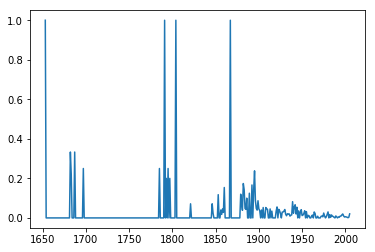



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . b . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


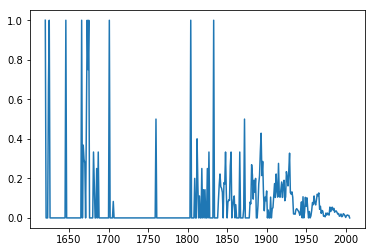



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


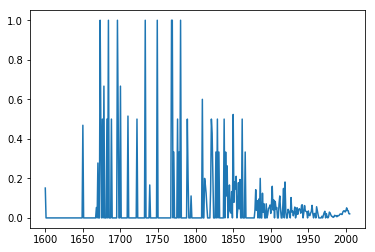



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b . . . . . =
. . . . . b . . . =
w . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


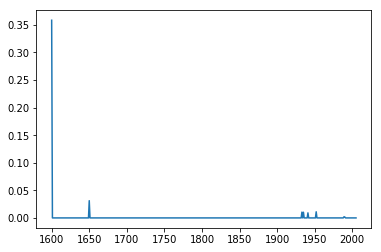



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . w . . . . . =
. . b w . w . . . =
. . . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


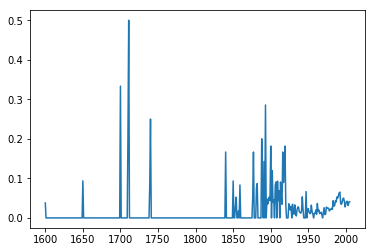



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . b w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


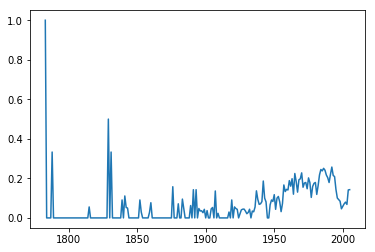



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . b w . w . . . =
. . . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


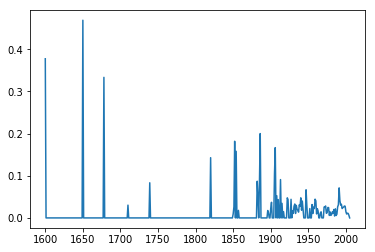



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. b . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


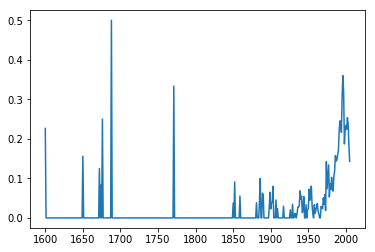



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


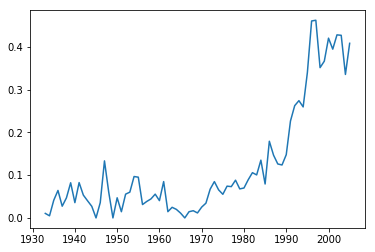



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b b . w . . =
. . . b w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


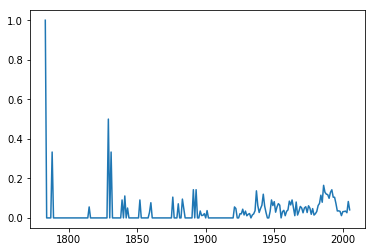



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
b . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


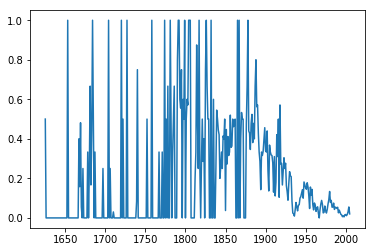



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . b . . b . . =
. . w . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


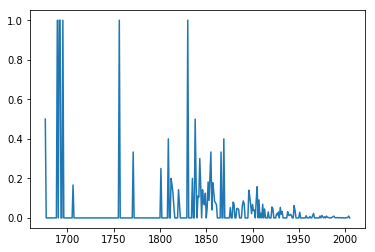

In [80]:
min_years_with_pattern_to_plot = 2
for pattern_frequency_info in pattern_frequencies:
    pat_freq = []
    # skip all zero frequency years in the beginning
    num_skip = 0
    num_years_with_pattern = 0
    done_skip = False
    for info in pattern_frequency_info.yearly_match_info:
        pat_freq.append(info.frequency)
        if info.frequency != 0:
            num_years_with_pattern += 1
        if info.frequency == 0 and not done_skip:
            num_skip += 1
        else:
            done_skip = True
    
    print()
    print(pattern_frequency_info.pattern)
    if num_years_with_pattern < min_years_with_pattern_to_plot:
        print("Skipping plot, only found in %s years" % num_years_with_pattern)
    else:
        plt.figure()
        plt.plot(years[num_skip:], pat_freq[num_skip:])
        plt.show()
    print()